In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm

from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from datascience import *
import numpy as np
from itertools import groupby

plt.style.use('seaborn')

#Data set can be found at https://www.kaggle.com/wsj/college-salaries

In [2]:
#importing data set
rank = pd.read_csv('salaries-by-college-type-CLEAN.csv')
# Dropping the 25th and 75th percentile salary since it will not be needed in this project
rank_clean = rank.drop(['Mid-Career 25th Percentile Salary', 'Mid-Career 75th Percentile Salary'], axis=1)
rank_clean.columns = ['School Name','School Type', 'Starting Median Salary', 'Mid-Career Median Salary']
rank_clean.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00"
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00"
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00"


In [3]:
#converting currency data into float and string values to be used for data manipulation
string_col = rank_clean[rank_clean.columns[0:2]].astype(str)
salary_col = rank_clean[rank_clean.columns[2:]].replace('[\$,]', '', regex=True).astype(float)

#placing the new column data types into the data set
rank_clean = pd.concat([string_col, salary_col], axis=1, sort=False)

rank_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 4 columns):
School Name                 269 non-null object
School Type                 269 non-null object
Starting Median Salary      269 non-null float64
Mid-Career Median Salary    269 non-null float64
dtypes: float64(2), object(2)
memory usage: 8.5+ KB


In [32]:
#converting currency data into float and string values to be used for data manipulation
salary_col = degrees_clean[degrees_clean.columns[1:]].replace('[\$,]', '', regex=True).astype(float)

#placing the new column data types into the data set
degrees_clean = pd.concat([salary_col], axis=1, sort=False)

In [7]:
#Creating a  new column wich shows if a school is a party school or not, then takes means of both
#Also removing the school type 'party' to state since they are state schools, since want to compare these results seperately
party_school = 'No'
rank_clean['Party School'] = party_school
rank_clean['Party School'][rank_clean['School Type'].str.contains('Party')] = 'Yes'
rank_clean['School Type'][rank_clean['School Type'].str.contains('Party')] = 'State'

rank_clean

C:\Users\Z\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Z\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Party School
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,No
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,No
2,Harvey Mudd College,Engineering,71800.0,122000.0,No
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,No
4,Cooper Union,Engineering,62200.0,114000.0,No
5,Worcester Polytechnic Institute (WPI),Engineering,61000.0,114000.0,No
6,Carnegie Mellon University (CMU),Engineering,61800.0,111000.0,No
7,Rensselaer Polytechnic Institute (RPI),Engineering,61100.0,110000.0,No
8,Georgia Institute of Technology,Engineering,58300.0,106000.0,No
9,Colorado School of Mines,Engineering,58100.0,106000.0,No


In [9]:
#Creating a new column for a percent difference from starting salary to mid-career salary
percent_diff = (rank_clean['Starting Median Salary'] / rank_clean['Mid-Career Median Salary']) *100
rank_clean['Percent Difference'] = percent_diff
rank_clean

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Party School,Percent Difference
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,No,57.301587
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,No,61.382114
2,Harvey Mudd College,Engineering,71800.0,122000.0,No,58.852459
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,No,54.736842
4,Cooper Union,Engineering,62200.0,114000.0,No,54.561404
5,Worcester Polytechnic Institute (WPI),Engineering,61000.0,114000.0,No,53.508772
6,Carnegie Mellon University (CMU),Engineering,61800.0,111000.0,No,55.675676
7,Rensselaer Polytechnic Institute (RPI),Engineering,61100.0,110000.0,No,55.545455
8,Georgia Institute of Technology,Engineering,58300.0,106000.0,No,55.000000
9,Colorado School of Mines,Engineering,58100.0,106000.0,No,54.811321


School Type
Engineering     56.970520
Ivy League      50.590321
Liberal Arts    51.600849
State           56.303099
Name: Percent Difference, dtype: float64

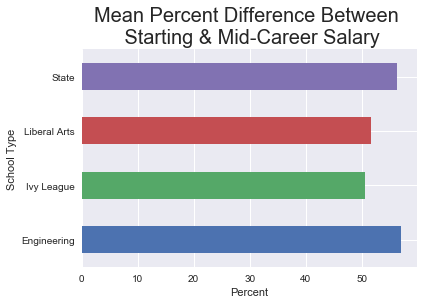

In [10]:
#Create a bar graph of the percent difference between starting and mid-career salary accoring to type
avg_pct_diff = rank_clean.groupby('School Type')['Percent Difference'].mean()
avg_pct_diff.plot.barh()
plt.title("Mean Percent Difference Between \n Starting & Mid-Career Salary", fontsize=20)
plt.xlabel("Percent")
avg_pct_diff

,Starting Median Salary
School Type,
Engineering,59057.894737
Ivy League,60475.000000
Liberal Arts,45746.808511
State,44289.230769


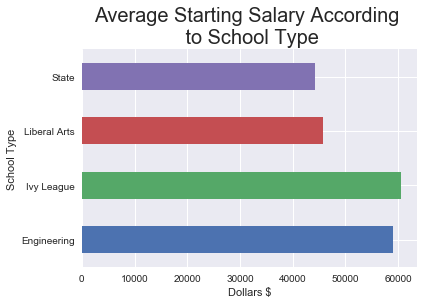

In [11]:
#Creates the mean of each school type as a starting salary
start_sal_mean = rank_clean.groupby('School Type')['Starting Median Salary'].mean()
combo_starting_school_type_table = pd.concat([start_sal_mean], axis=1)

start_sal_mean.plot.barh()
plt.title("Average Starting Salary According \n to School Type", fontsize=20)
plt.xlabel("Dollars $")
combo_starting_school_type_table

Text(0.5,0,'Dollars $')

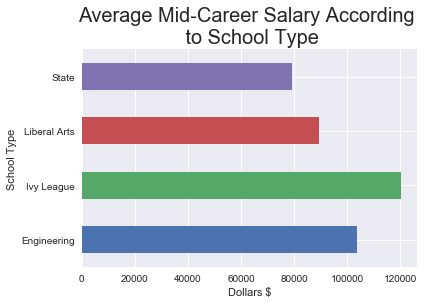

In [12]:
#Creates the mean of each school type as a mid career
mid_sal_mean = rank_clean.groupby('School Type')['Mid-Career Median Salary'].mean()
combo_mid_school_type_table = pd.concat([mid_sal_mean], axis=1)
combo_mid_school_type_table
mid_sal_mean.plot.barh()
plt.title("Average Mid-Career Salary According \n to School Type", fontsize=20)
plt.xlabel("Dollars $")

In [13]:
#Creating a new column for a percent difference from starting salary to mid-career salary
rank_clean['School Value'] = rank_clean['School Type']
rank_clean.head()


,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Party School,Percent Difference,School Value
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,No,57.301587,Engineering
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,No,61.382114,Engineering
2,Harvey Mudd College,Engineering,71800.0,122000.0,No,58.852459,Engineering
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,No,54.736842,Engineering
4,Cooper Union,Engineering,62200.0,114000.0,No,54.561404,Engineering


Text(0.5,1,'Distribution of Starting Career Salary')

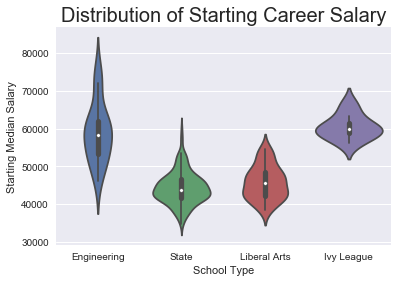

In [33]:
#Create a violin plot for starting career salary
sns.violinplot("School Type", "Starting Median Salary", data=rank_clean);
plt.title("Distribution of Starting Career Salary", fontsize=20)

Text(0.5,1,'Distribution of Starting Career Salary')

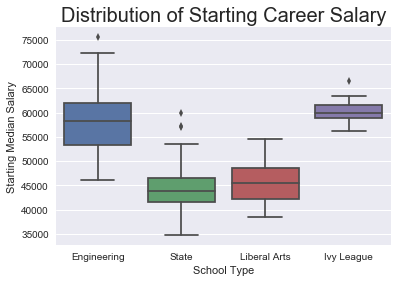

In [35]:
#Create a box plot for starting career salary
sns.boxplot("School Type", "Starting Median Salary", data=rank_clean);
plt.title("Distribution of Starting Career Salary", fontsize=20)

Text(0.5,1,'Distribution of Mid-Career Salary')

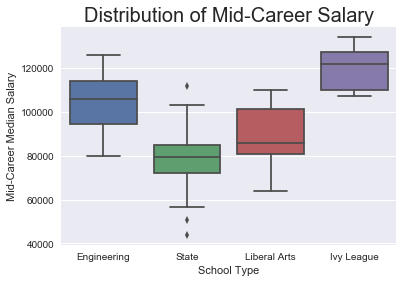

In [36]:
#Create a box plot for mid-career salary
sns.boxplot("School Type", "Mid-Career Median Salary", data=rank_clean)
plt.title("Distribution of Mid-Career Salary", fontsize=20)

Text(0.5,1,'Distribution of Mid-Career Salary')

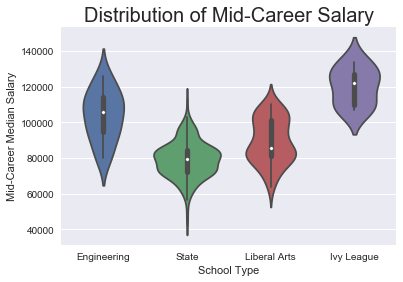

In [37]:
#Create a violin plot for mid-career salary
g = sns.violinplot("School Type", "Mid-Career Median Salary", data=rank_clean)
plt.title("Distribution of Mid-Career Salary", fontsize=20)

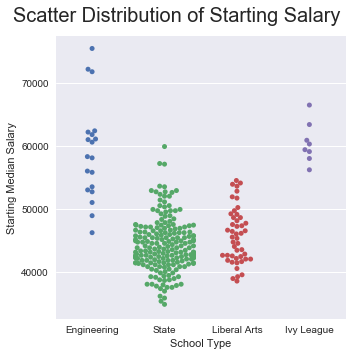

In [38]:
#Create a scatter for all school to see top school starting salary
g = sns.catplot(x="School Type", y="Starting Median Salary", kind="swarm", data=rank_clean);
g.fig.suptitle('Scatter Distribution of Starting Salary', fontsize=20)
plt.subplots_adjust(top=0.9)

In [39]:
#Creates the mean of each school type as a starting salary
start_sal_mean = rank_clean.groupby('School Type')['Starting Median Salary'].mean()
combo_starting_school_type_table = pd.concat([start_sal_mean], axis=1)
combo_starting_school_type_table

,Starting Median Salary
School Type,
Engineering,59057.894737
Ivy League,60475.000000
Liberal Arts,45746.808511
State,44289.230769


In [40]:
#Creates the mean of each school type as a starting salary
mid_sal_mean = rank_clean.groupby('School Type')['Mid-Career Median Salary'].mean()
combo_starting_school_type_table = pd.concat([start_sal_mean], axis=1)
combo_starting_school_type_table

,Starting Median Salary
School Type,
Engineering,59057.894737
Ivy League,60475.000000
Liberal Arts,45746.808511
State,44289.230769


In [41]:
#Seperate each school type to its own data set BY INDEX

eng_data = rank_clean.loc[0:8]
topeng = eng_data.nlargest(5, 'Starting Median Salary')





In [42]:
state1_data = rank_clean.loc[19:38]
state2_data = rank_clean.loc[94:268]
state_data = state1_data.append(state2_data)
topstate = state_data.nlargest(5, 'Starting Median Salary')

In [43]:
ivy_data = rank_clean.loc[86:93]
topivy = ivy_data.nlargest(5, 'Starting Median Salary')

In [44]:
lib_data = rank_clean.loc[39:85]
toplib = lib_data.nlargest(5, 'Starting Median Salary')

In [45]:
#combine all top 5 highest starting salary schools into one data set
top_five_start = topeng
top_five_start = top_five_start.append(topivy)
top_five_start = top_five_start.append(topstate)
top_five_start = top_five_start.append(toplib)
top_five_start

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Party School,Percent Difference,School Value
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,No,61.382114,1.0
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,No,57.301587,1.0
2,Harvey Mudd College,Engineering,71800.0,122000.0,No,58.852459,1.0
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,No,54.736842,1.0
4,Cooper Union,Engineering,62200.0,114000.0,No,54.561404,1.0
87,Princeton University,Ivy League,66500.0,131000.0,No,50.763359,NaN
89,Harvard University,Ivy League,63400.0,124000.0,No,51.129032,NaN
90,University of Pennsylvania,Ivy League,60900.0,120000.0,No,50.750000,NaN
91,Cornell University,Ivy League,60300.0,110000.0,No,54.818182,NaN
93,Columbia University,Ivy League,59400.0,107000.0,No,55.514019,NaN


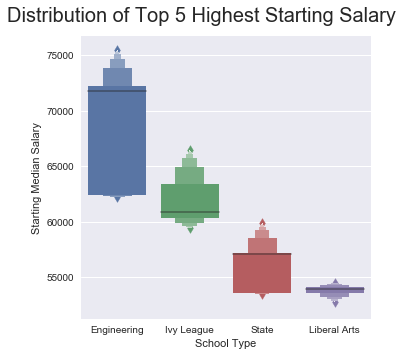

In [46]:
#Creating a boxen plot to compare the top 5 highest starting salariesS
gg = sns.catplot("School Type", "Starting Median Salary", data=top_five_start, kind="boxen")
gg.fig.suptitle('Distribution of Top 5 Highest Starting Salary', fontsize=20)
plt.subplots_adjust(top=0.9)

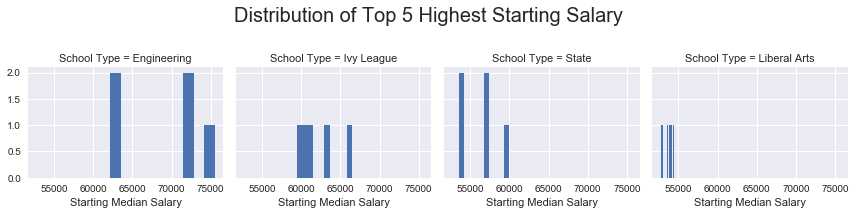

In [47]:
#Creating a map graph of each school type and starting salary
g = sns.FacetGrid(top_five_start, col="School Type")
g = g.map(plt.hist, "Starting Median Salary")

g.fig.suptitle('Distribution of Top 5 Highest Starting Salary', fontsize=20)
plt.subplots_adjust(top=0.7)